<a href="https://colab.research.google.com/github/hamersda/TUBES-PMC/blob/master/UTS_DSKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTS Dasar Sistem dan Kendali Cerdas
* 13218050 Hadim Aerasda
* 13219601 Bella Sulistya Putri

####Import Library

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import io
import tensorflow as tf
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 

%matplotlib inline

####Import Data from Kaggle

Data sudah didownload dan dimasukkan kedalam google drive

In [136]:
from google.colab import drive

drive.mount('/content/drive')
# file/folder path with your own
file_path = '/content/drive/MyDrive/Colab Notebooks/UTS DSKC/housing.csv'

# read the file into a pandas dataframe
import pandas as pd
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 - Eksplorasi, analisis, dan Visualisasi Data

### Eksplorasi dan Analisis Data

#### Struktur Data

In [137]:
print(f'Banyak Data Rumah = {len(df)} Rumah')
df.head()

Banyak Data Rumah = 20640 Rumah


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Dari tabel yang didapatkan diatas diketahui bahwa data yang dimiliki adalah sebagai berikut:
* Jumlah fitur yang dimiliki adalah 10 fitur
* Jumlah data yang dimiliki adalah sebanyak 20640 rumah

#### Deskripsi Tiap Kategori Data

Hal ini perlu untuk diketahui untuk dapat mempermudah dalam pengolahan data-data yang akan digunakan nantinya

In [138]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Dari menjankan fungsi `describe()` seperti diatas kita berhasil mendapatkan data-data seperti berikut:
* count = Jumlah data yang tersedia
* mean = Rata-rata keseluruhan data
* std = Standar Deviasi dari observasi data
* min = nilai minimum yang terdapat pada data
* max = nilai maksimum yang terdapat pada data
* Persebaran nilai data

Dari deskripsi didapatkan poin-poin sebagai berikut:
* Pada data yang tersedia tidak semuanya memiliki informasi mengenai total_bedrooms terlihat pada `count` yang tidak berjumlah 20640
* variabel `house_median_value` memiliki rentang variasi data yang sangat lebar dimana hal tersebut dapat dilihat pada nilai `std`nya
* `longitude` dan `latitude` memiliki rentang variasi data yang sangat kecil


### Visualisasi Data

#### Plot Histogram Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

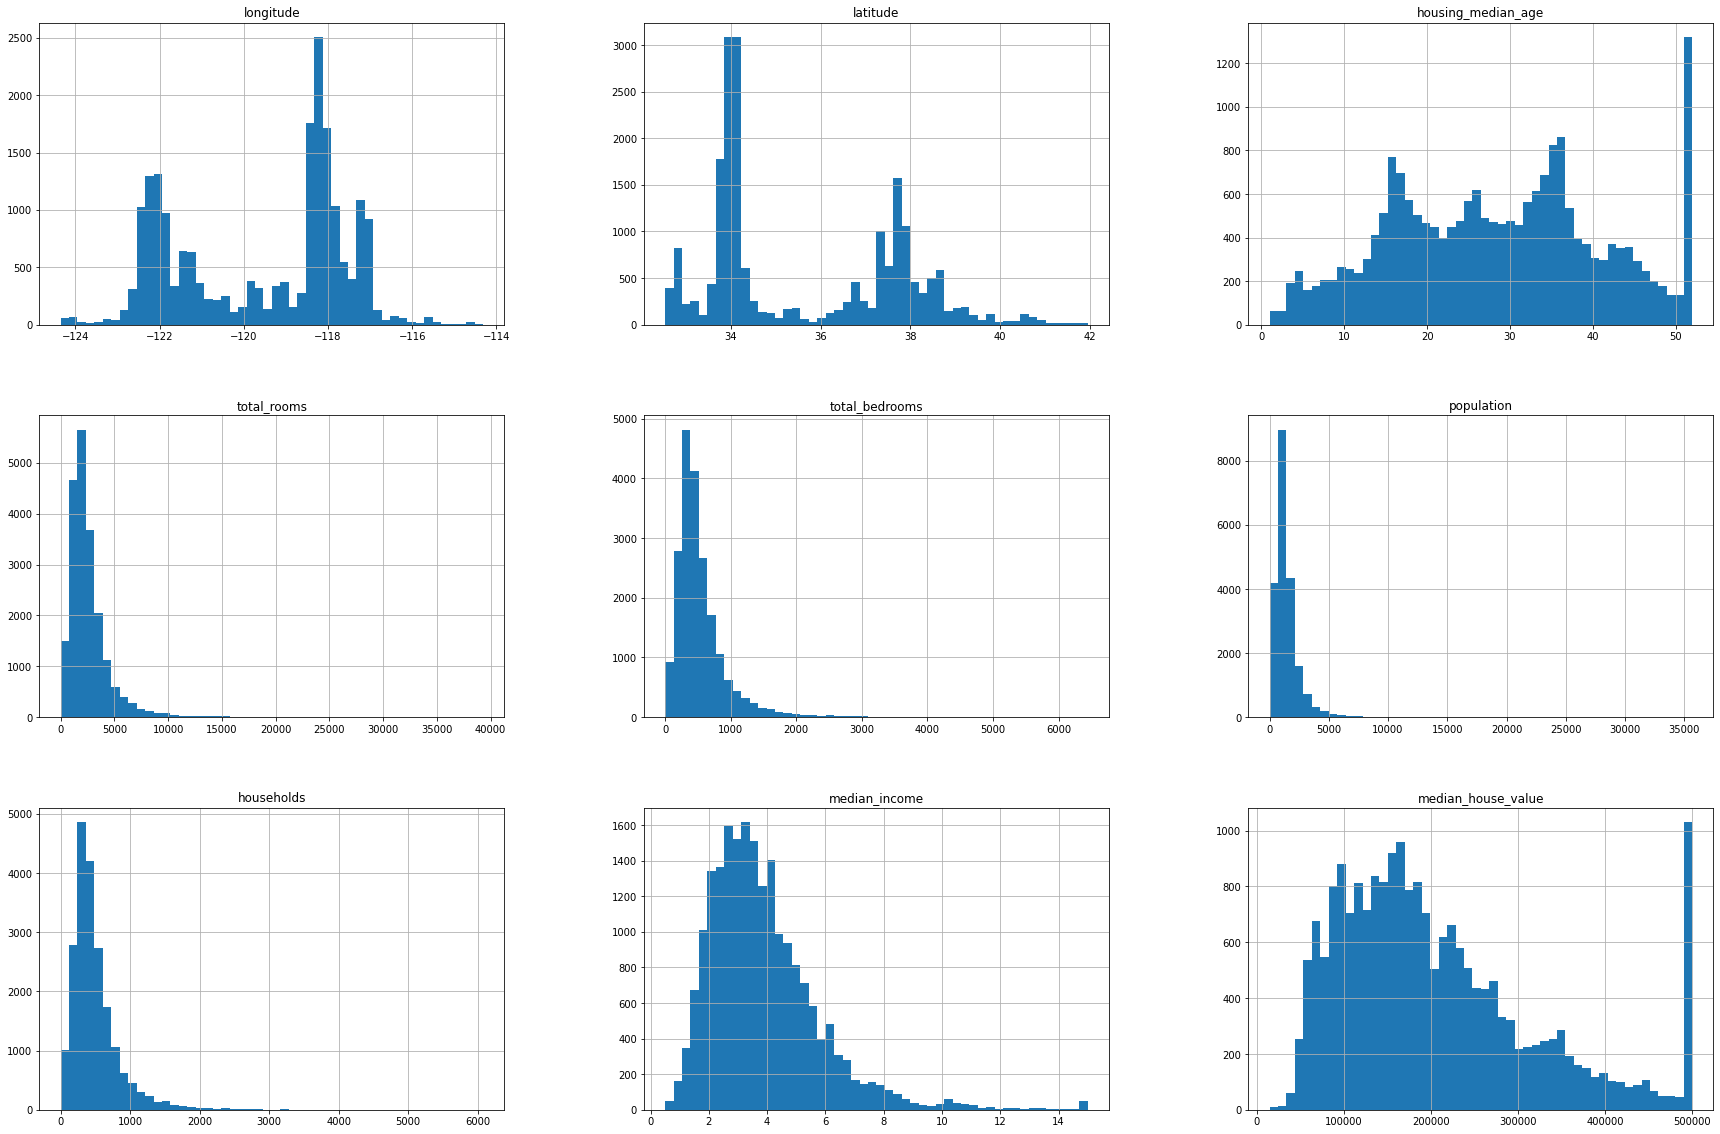

In [139]:
df.hist(bins = 50 , figsize=(30 , 20))

Dari visualisasi plot histogram yang dilakukan didapatkan poin-poin sebagai berikut:
* Sebagian besar rumah terdapat pada kisaran `longitude` -122 dan -118
* Sebagian besar rumah terdapat pada kisaran `latitude` 34 dan 38
* Sebagian besar rumah memiliki umur lebih dari 50 tahun
* Sangat sedikit dalam suatu blok yang memiliki total ruangan diatas 5000
* Sangat sedikit dalam suatu blok yang memiliki total kamar diatas 1000
* Sangat sedikit blok yang memiliki jumlah populasi diatas 5000
* Sebagian besar masyarakat pada suatu blok memiliki median income yang berkisar pada `US$` 20000 - `US$` 60000
* Banyak blok yang rumah-rumahnya memiliki median value > `US$`50000


#### Visualisasi Data `Longitude`, `Latitude`, `Population`

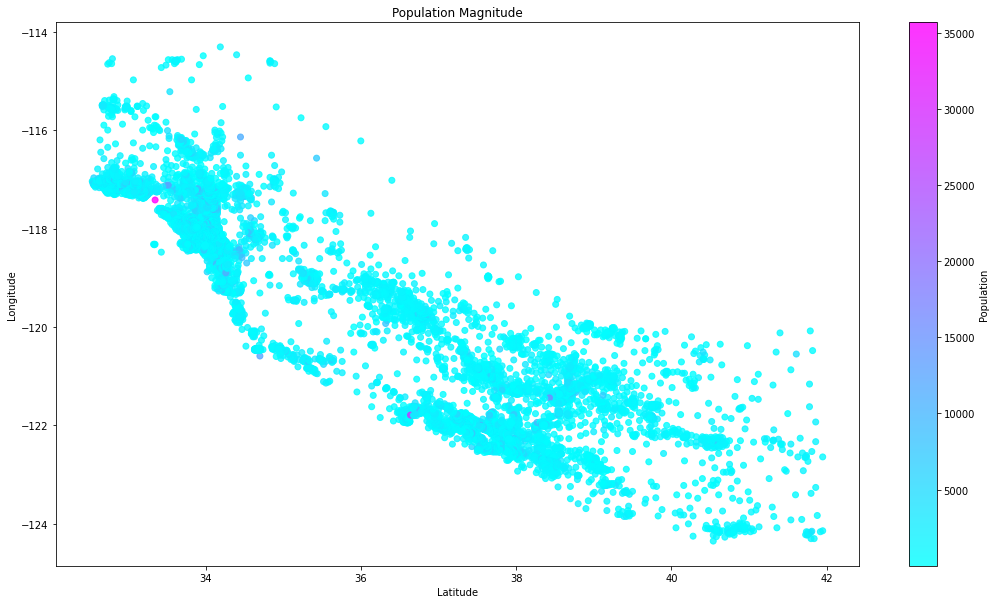

In [140]:
plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['population'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Population")
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Dari visualisasi scatter plot yang dilakukan diatas bisa didapatkan informasi mengenai bagiamana persebaran populasi dari blok-blok perumahan california berdasarkan posisinya (`Latitude` dan `Longitude`). Disini dapat kita lihat terdapat beberapa lokasi yang memiliki populasi sangat tinggi.

#### Visualisasi  Price terhadap Longtitude dan Latitude

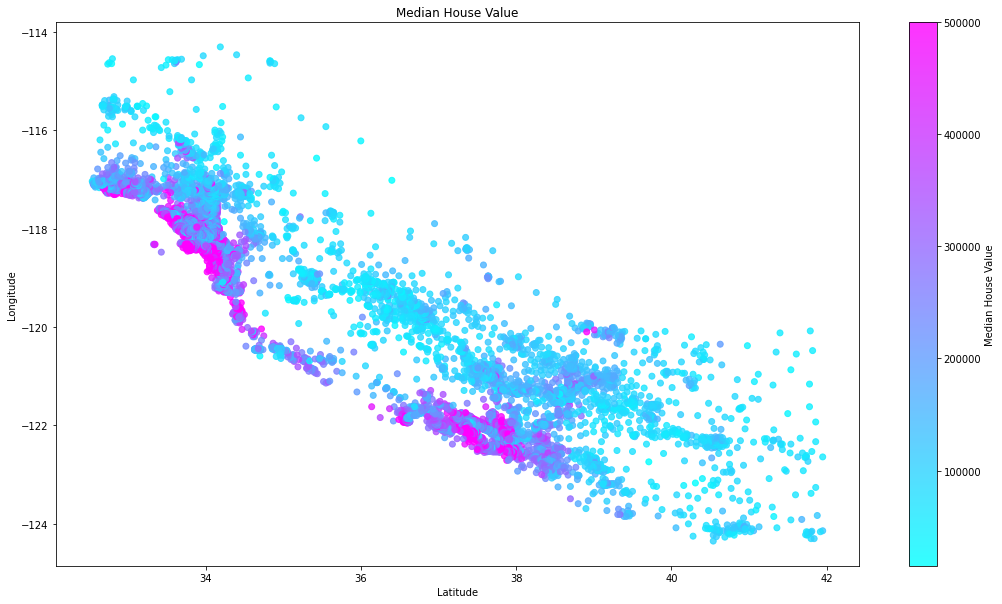

In [141]:
plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['median_house_value'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Median House Value")
plt.title('Median House Value')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Dari visualisasi yang didapatkan ada hal menarik yang didapatkan disini dapat kita lihat bahwa rumah-rumah dengan lokasi pada pinggiran (terhadap keseluruhan data blok-blok rumah yang dimiliki) yaitu pada daerah barat daya (Semakin dekat dengan laut) memiliki median harga yang cenderung tinggi

## 2 - Pemilihan Variabel Input untuk Kedua Model

### Korelasi Tiap Data terhadap Variabel `median_house_value`

Sebelum menentukan variabel mana saja yang akan digunakan dalam pemodelan nantinya akan lebih baik jika kita bisa mengetahui bagaimana korelasinya terhadap variabel-variabel lainnya. Sehingga pemodelan dapat dilakukan dengan lebih baik nantinya.

In [142]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Model dengan Single Variable

Pada model dengan single variable akan digunakan variabel yang menurut kami akan sangat berkaitan dengan nilai yang kami prediksi (`median_house_value` : Median dari harga rumah-rumah dalam suatu blok yang memiliki satuan US dollar) yaitu variabel `median_income` : Median pendapatan untuk rumah tangga dalam suatu blok perumahan. Pemilihan variabel ini karena nilai korelasinya yang sangat baik (paling mendekati 1)

### Model dengan Multi Variable

Pada model dengan multi variable akan digunakan variabel-variabel sebagai berikut:
* `ocean_proximity` : Lokasi Rumah dengan Memperhatikan Kedekatannya dengan Laut
* `total_rooms` : Total ruangan dalam blok tertentu
* `housing_median_age` : Median dari umur rumah dalam suatu blok

## 3 - Pengolahan Variabel Kategorikal `ocean_proximity`

### Struktur Data

Pertama-tama kita perlu mengetahui kategori apa aja yang terdapat pada data ini dengan menggunakan perintah sebagai berikut:

In [143]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Setelah menjalankan perintah tersebut diketahui terdapat 5 kategori yaitu `<1H OCEAH`, `INLAND`, `NEAR OCEAN`, `NEAR BAY`, dan `ISLAND`

### Visualisasi `ocean_proximity`

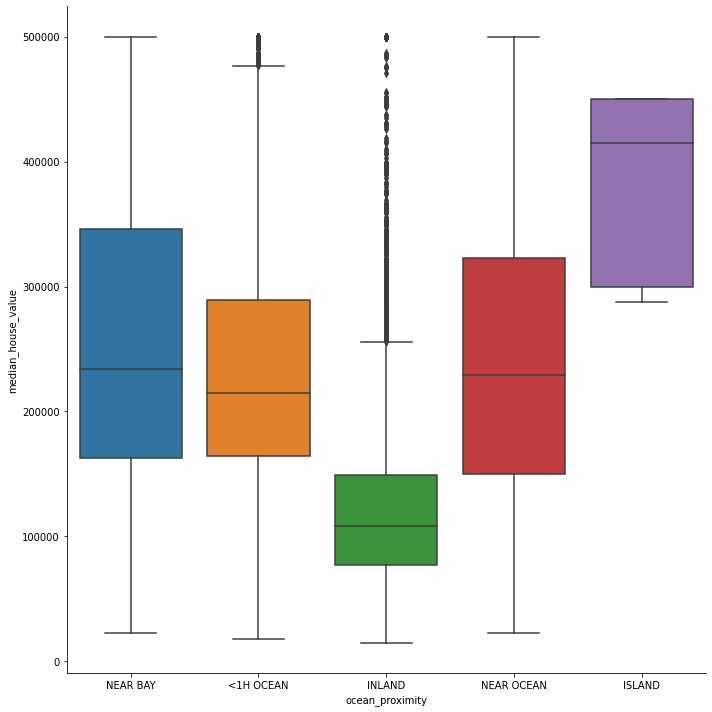

In [144]:
sns.catplot(data=df, x="ocean_proximity", y="median_house_value", kind="box", height=10, aspect=1)

Dari plot data yang didapatkan dapat dilihat, bahwa semakin mendekati laut harga akan semakin tinggi. Hal ini mengklarifikasi hasil analisis yang didapatkan dari plot 'longitude' , 'latitude' dan 'median_house_value' yang telah didapatkan sebelumnya

### One-Hot Encode

In [145]:
# Melakukan one hot encoding menggunakan pd.get_dummies()
df_onehot = pd.get_dummies(df, columns=['ocean_proximity'])

# Tampilkan hasil
df_onehot.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


Data ocean_proximity telah diolah menjadi data biner untuk setiap kategorinya dengan menggunakan one-hot encoder seperti yang dapat dilihat diatas

## 4 - Persiapan Data


### Pemeriksaan Data

Pemerikasaan data diperlukan untuk memastikan bahwa keseluruhan data yang digunakan valid dan tidak terdapat data kosong

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dari informasi diatas dapat dilihat bahwa terdapat data-data yang memiliki nilai `null` pada variabel `total_bedrooms`. Hal ini dikarenakan dari 20640 data hanya 20433 yang memiliki `non-null value`.

### Pembersihan Data

Karena terdapat beberapa data yang tidak memiliki data mengenai `total_bedrooms` maka perlu dilakukan pembersihan terhadap data-data tersebut

In [147]:
data_cleaned = df.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Dari informasi yang didapatkan dapat disimpulkan data-data yang terdapat pada data frame `data_cleaned` merupakan data-data yang telah dibersihkan dan tidak terdapat lagi data yang memiliki nilai `null` pada salah satu variabelnya

### Penanganan Outliner (Opsional)

Dari visualisasi `boxplot` dari data yang didapatkan sebelumnya antara kategorikal dengan median harga terlihat terdapat data-data outliner pada kategori `INLAND` dan `<1H OCEAN`. Data outliner tersebut akan didirekayasa dengan menggunakan suatu metode untuk dapat memperoleh pemodelan yang baik nantinya.

#### Penghapusan Data outliner

In [148]:
# Data <1H OCEAN
# hitung nilai kuartil
q1 = data_cleaned.loc[data_cleaned["ocean_proximity"] == '<1H OCEAN']['median_house_value'].quantile(0.25)
q3 = data_cleaned.loc[data_cleaned["ocean_proximity"] == '<1H OCEAN']['median_house_value'].quantile(0.75)
iqr = q3 - q1

q1_a = data_cleaned.loc[data_cleaned["ocean_proximity"] == 'INLAND']['median_house_value'].quantile(0.25)
q3_a = data_cleaned.loc[data_cleaned["ocean_proximity"] == 'INLAND']['median_house_value'].quantile(0.75)
iqr_a = q3_a - q1_a

# tentukan batas atas dan batas bawah
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


lower_bound_a = q1_a - (1.5 * iqr_a)
upper_bound_a = q3_a + (1.5 * iqr_a)

print(lower_bound)
print(upper_bound)
print(lower_bound_a)
print(upper_bound_a)
# hapus outlier
data_cleaned_outlinerDel = data_cleaned.loc[(data_cleaned["ocean_proximity"] == 'NEAR OCEAN') | (data_cleaned["ocean_proximity"] == 'NEAR BAY') | (data_cleaned["ocean_proximity"] == 'ISLAND') | ((data_cleaned["ocean_proximity"] == 'INLAND') & (data_cleaned['median_house_value'] < upper_bound_a)) | ((data_cleaned["ocean_proximity"] == '<1H OCEAN') & (data_cleaned['median_house_value'] < upper_bound))]

-23462.5
477237.5
-29500.0
256100.0


Pada program penghilangan data outliner diatas digunakan parameter `upper_bound` saja baik untuk `<1H OCEAN` maupun `INLAND` karena berdasarkan plot sebelumnya bisa dipastikan tidak ada data yang memiliki `median_house_value` dibawah `lower_bound`

In [149]:
data_cleaned_outlinerDel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19507 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19507 non-null  float64
 1   latitude            19507 non-null  float64
 2   housing_median_age  19507 non-null  float64
 3   total_rooms         19507 non-null  float64
 4   total_bedrooms      19507 non-null  float64
 5   population          19507 non-null  float64
 6   households          19507 non-null  float64
 7   median_income       19507 non-null  float64
 8   median_house_value  19507 non-null  float64
 9   ocean_proximity     19507 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dari info diatas diketahui bahwa data frame baru yang diberi nama `data_cleaned_outlinerDel` yang merupakan data frame setelah data-data outliner dihapus tidak memiliki data yang memiliki nilai `null`.

Selanjutnya data ini kita plot box kembali.

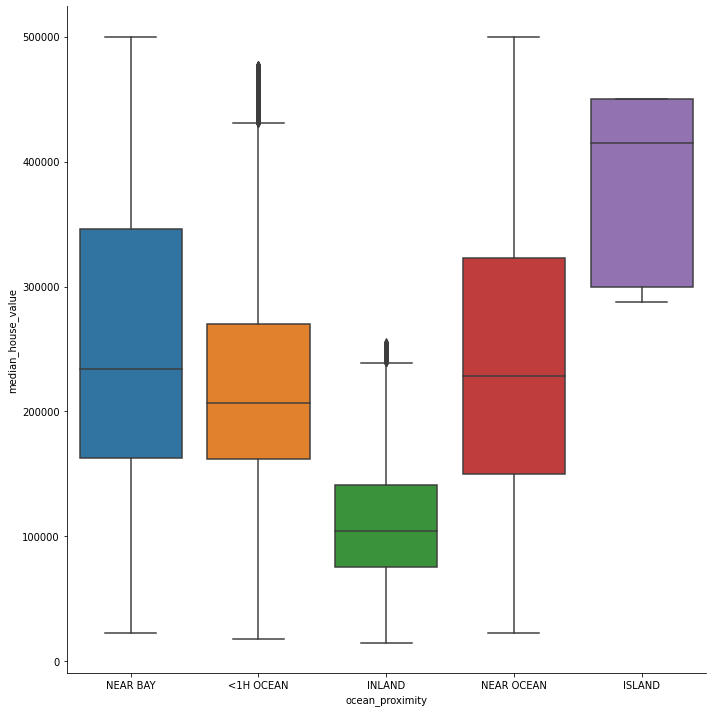

In [150]:
sns.catplot(data=data_cleaned_outlinerDel, x="ocean_proximity", y="median_house_value", kind="box", height=10, aspect=1)

Dari plot baru yang didapatkan terhadap `ocean_proximity` dapat dilihat bahwa tidak terdapat lagi data outliner. Dari plot ini dapat dilihat jelas bahwa posisi suatu blok terhadap laut sangat mempengaruhi median harganya. Hal ini sama dengan yang didapatkan dari data scatter plot harga terhadap `longtitude` dan `latitude`yang telah diperoleh sebelumnya

### Normalisasi Data

### Model dengan Single Variabel

Pada model single variabel sebelum melakukan normalisasi maka dilakukan terlebih dahulu pemindahan nilai-nilai variabel yang digunakan dari data frame ke numpy array. Disini akan digunakan data frame `data_cleaned_outlinerDel` yang merupakan data frame yang tidak terdapat nilai `null` maupun data outliner.

In [151]:
arr_single = data_cleaned_outlinerDel[["median_income", "median_house_value"]].values

Pengecekan array `arr_single`

In [152]:
arr_single[:10]

array([[8.3252e+00, 4.5260e+05],
       [8.3014e+00, 3.5850e+05],
       [7.2574e+00, 3.5210e+05],
       [5.6431e+00, 3.4130e+05],
       [3.8462e+00, 3.4220e+05],
       [4.0368e+00, 2.6970e+05],
       [3.6591e+00, 2.9920e+05],
       [3.1200e+00, 2.4140e+05],
       [2.0804e+00, 2.2670e+05],
       [3.6912e+00, 2.6110e+05]])

Dari `describe()` yang telah dilakukan sebelumnya diketahui poin-poin sebagai berikut:




`median_income`
* memiliki `max` sebesar 15.0001
* memiliki `min` sebesar 0.4999
* satuan (`US$`10000)

`median_house_value`
* memiliki `max` sebesar 500001.0
* memiliki `min` sebesar 14999.0
* satuan (`US$`) 

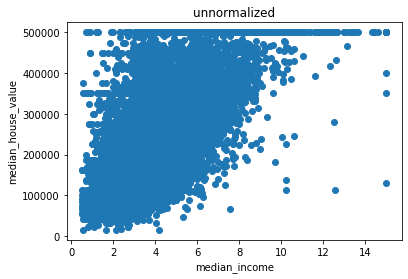

In [153]:
plt.scatter(arr_single[:,0], arr_single[:,1])
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("unnormalized")
plt.show()


Dari hal tersebut maka dapat dilihat bahwa variabel `median_income` memiliki rentang nilai yang cukup lebar. Namun, karena pada pemodelan single variabel fitur yang digunakan hanya satu maka normalisasi tidak harus dilakukan.

### Model dengan Multi Variabel

In [154]:
arr_multi = data_cleaned_outlinerDel[["ocean_proximity", "total_rooms", "housing_median_age", "median_house_value"]].values

Pengecekan `arr_multi`

In [155]:
arr_multi[:10]

array([['NEAR BAY', 880.0, 41.0, 452600.0],
       ['NEAR BAY', 7099.0, 21.0, 358500.0],
       ['NEAR BAY', 1467.0, 52.0, 352100.0],
       ['NEAR BAY', 1274.0, 52.0, 341300.0],
       ['NEAR BAY', 1627.0, 52.0, 342200.0],
       ['NEAR BAY', 919.0, 52.0, 269700.0],
       ['NEAR BAY', 2535.0, 52.0, 299200.0],
       ['NEAR BAY', 3104.0, 52.0, 241400.0],
       ['NEAR BAY', 2555.0, 42.0, 226700.0],
       ['NEAR BAY', 3549.0, 52.0, 261100.0]], dtype=object)

total_room :
* memiliki max sebesar 39320.000000
* memiliki min sebesar 2.000000
* Jumlah total rooms dalam satu block

housing_median_age:
* memiliki max sebesar 52.000000
* memiliki min sebesar 1.000000
* Median age dari suatu rumah dalam sebuah block , angka yang lebih kecil merupa

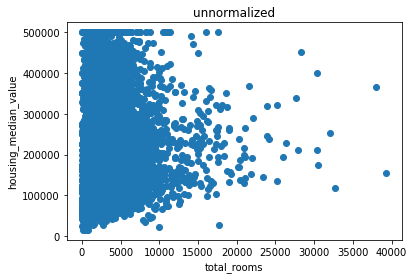

In [156]:
plt.scatter(arr_multi[:,1], arr_multi[:,3])
plt.xlabel("total_rooms")
plt.ylabel("housing_median_value")
plt.title("unnormalized")
plt.show()

#### Normalisasi Z

In [157]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m data, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm)

## 5 - Implementasi Kedua Model

### Model dengan Single Variabel

Pada regresi linear dengan single variabel, model prediksi yang digunakan adalah $f_{w,b}$ (`median_house_value`) untuk sebuah data $x^{(i)}$ (`median_income`) yang secara matematis adalah sebagai berikut:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

* $b$ adalah *bias* 
* $w$ adalah *weight*

In [158]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): input data to model (median_income), m data 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    f_wb = w*x + b
        
    return f_wb

Pada pemodelan ini akan dibutuhkan cost function
 * cost function  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* total cost
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$

dengan m adalah banyaknya data

In [159]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (median_income) 
        y (ndarray): Shape (m,) Label (Actual median_cost_value)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###  
    #Calculate Prediction
    fp = w*x + b
    #Calculate cost
    cost = (fp - y)**2
    #Total cost
    total_cost = np.sum(cost)
    total_cost = total_cost / (2*m)
    ### END CODE HERE ### 

    return total_cost

Pembelajaran model akan dilakukan dengan menggunakan algoritma gradient descent

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} & 
\newline & \rbrace\end{align*}$$

parameters $w, b$ diperbarui secara simultan dimana
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \
$$
* m adalah banyaknya data

    
*  $f_{w,b}(x^{(i)})$ model prediksi
* $y^{(i)}$ nilai target

In [160]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (median_income) 
      y (ndarray): Shape (m,) Label (Actual median_cost_value)
      w, b (scalar): Parameters of the model 
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    #Calculate Prediction
    fp = w*x + b
    #Calculate Gradient
    djb  = fp - y
    djw = (fp - y)*x
    #Total Gradient
    dj_db = (np.sum(djb))/m
    dj_dw = (np.sum(djw))/m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [161]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [162]:
# Melakukan one hot encoding menggunakan pd.get_dummies()
data_cleaned_outlinerDel_hotEncode = pd.get_dummies(data_cleaned_outlinerDel, columns=['ocean_proximity'])

# Tampilkan hasil
data_cleaned_outlinerDel_hotEncode.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Model dengan Multi Variabel

Encode data kategorikal `ocean_proximity`

In [163]:
# Mengilangkan variabel-variabel yang tidak diperlukan
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('longitude', axis=1)
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('latitude', axis=1)
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('total_bedrooms', axis=1)
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('households', axis=1)
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('median_income', axis=1)
data_cleaned_outlinerDel_hotEncode = data_cleaned_outlinerDel_hotEncode.drop('population', axis=1)

In [164]:
# Tampilkan hasil
data_cleaned_outlinerDel_hotEncode.head()

,housing_median_age,total_rooms,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,452600.0,0,0,0,1,0
1,21.0,7099.0,358500.0,0,0,0,1,0
2,52.0,1467.0,352100.0,0,0,0,1,0
3,52.0,1274.0,341300.0,0,0,0,1,0
4,52.0,1627.0,342200.0,0,0,0,1,0


Pada model dengan multi-variabel akan digunakan neural network dengan 8 masukan sesuai dengan data diatas

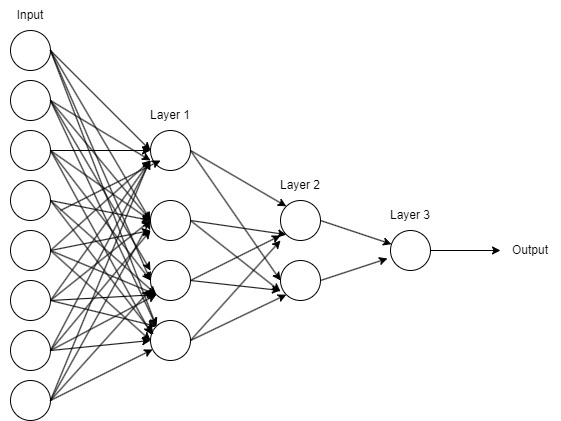

In [165]:
model = Sequential(
    [               
        tf.keras.Input(shape=(7,)),    #specify input size
        Dense(4, activation='sigmoid', name = 'layer1'),
        Dense(2, activation='relu', name = 'layer2'),
        Dense(1, activation='linear', name = 'layer3')        
    ], name = "multi_variable_value_predict" 
) 
model.summary() 

Model: "multi_variable_value_predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 32        
                                                                 
 layer2 (Dense)              (None, 2)                 10        
                                                                 
 layer3 (Dense)              (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


Inisiasi weigt dan bias tiap layer

In [166]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
W3, b3 = model.get_layer("layer3").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W2{W3.shape}:\n", W3, f"\nb2{b2.shape}:", b3)

W1(7, 4):
 [[-0.42166063  0.39190775  0.11114019  0.6821558 ]
 [-0.49079007  0.41878623  0.68130904 -0.40267667]
 [ 0.13275695  0.13676375 -0.04787523  0.65286833]
 [-0.01212603  0.0532245   0.17780995 -0.4289336 ]
 [ 0.59353167 -0.09990275  0.35603422 -0.44548422]
 [ 0.40600222  0.4183758  -0.11375487 -0.6111421 ]
 [-0.04198575 -0.6307177  -0.25042742 -0.489025  ]] 
b1(4,): [0. 0. 0. 0.]
W2(4, 2):
 [[ 0.25654197 -0.33821034]
 [-0.6901727   0.712512  ]
 [-0.04136872 -0.39021587]
 [-0.36514854  0.14661479]] 
b2(2,): [0. 0.]
W2(2, 1):
 [[0.24651182]
 [1.1285361 ]] 
b2(2,): [0.]


## 6 - Pelatihan dan Validasi Kedua Model

### Model dengan Single Variabel

#### Pembagian Data

Sebelum model prediksi diminta untuk belajar maka perlu dibagi-bagi data-data yang tersedia untuk menjadi data train, validation, dan data test dengan rasio sebagai berikut:
* 70% Data Train
* 20% Data Validation
* 10% Data Test

In [167]:
# membagi array dengan rasio 7:2:1
arr_single_train, arr_single_val, arr_single_test = np.split(arr_single, [int(0.7 * len(arr_single)), int(0.9 * len(arr_single))])

print("Data Train = ",arr_single_train.shape)
print("Data Validasi = ",arr_single_val.shape)
print("Data Test = ",arr_single_test.shape)

Data Train =  (13654, 2)
Data Validasi =  (3902, 2)
Data Test =  (1951, 2)


#### Pelatihan Model

Inisiasi parameter model

In [168]:
initial_w = 0
initial_b = 0

Pelatihan model

In [169]:
# some gradient descent settings
iterations = 100000
alpha = 0.01

w,b,_,_ = gradient_descent(arr_single_train[:,0] ,arr_single_train[:,1], initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 16075001290.25   
Iteration 10000: Cost 2618331019.18   
Iteration 20000: Cost 2618331019.18   
Iteration 30000: Cost 2618331019.18   
Iteration 40000: Cost 2618331019.18   
Iteration 50000: Cost 2618331019.18   
Iteration 60000: Cost 2618331019.18   
Iteration 70000: Cost 2618331019.18   
Iteration 80000: Cost 2618331019.18   
Iteration 90000: Cost 2618331019.18   
w,b found by gradient descent: 39878.085221351226 41472.153477044754


Dari secara keseluruhan 100000 iterasi yang dilakukan. Dari histori data pembelajaran yang didapatkan, dapat dilihat nilai cost sudah minimum pada iterasi yang ke 10000.

#### Eksekusi Model yang telah dilatih

Digunakan data validasi

In [170]:
val_model = np.zeros((len(arr_single_val),3))
# median_income
val_model[:,0] = arr_single_val[:,0]
# actual median_house_value
val_model[:,1] = arr_single_val[:,1]
# predict median_house_value
val_model[:,2] = compute_model_output(arr_single_val[:,0], w, b)

In [171]:
print(val_model[:5,:])

[[5.35380000e+00 2.12500000e+05 2.54971446e+05]
 [2.74010000e+00 1.98100000e+05 1.50742095e+05]
 [3.03750000e+00 1.97600000e+05 1.62601837e+05]
 [4.27080000e+00 1.82800000e+05 2.11783480e+05]
 [3.92650000e+00 1.62000000e+05 1.98053455e+05]]


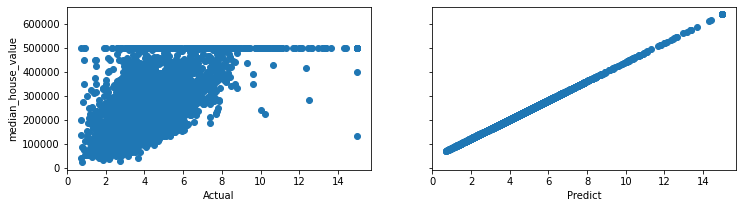

In [172]:
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
ax[0].scatter(val_model[:,0],val_model[:,1])
ax[0].set_xlabel("Actual")
ax[1].scatter(val_model[:,0],val_model[:,2])
ax[1].set_xlabel("Predict")
ax[0].set_ylabel("median_house_value")
plt.show()

#### Data Test

In [173]:
test_model = np.zeros((len(arr_single_test),3))
# median_income
test_model[:,0] = arr_single_test[:,0]
# actual median_house_value
test_model[:,1] = arr_single_test[:,1]
# predict median_house_value
test_model[:,2] = compute_model_output(arr_single_test[:,0], w, b)

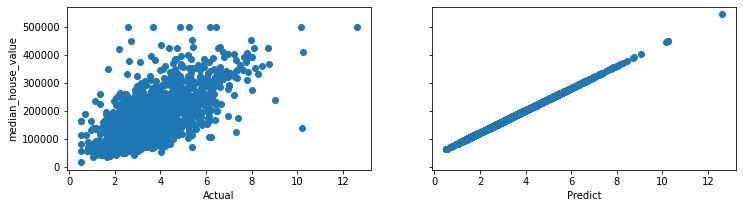

In [174]:
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
ax[0].scatter(test_model[:,0],test_model[:,1])
ax[0].set_xlabel("Actual")
ax[1].scatter(test_model[:,0],test_model[:,2])
ax[1].set_xlabel("Predict")
ax[0].set_ylabel("median_house_value")
plt.show()

### Model dengan Multi Variabel

#### Pembagian Data

Sebelum model prediksi diminta untuk belajar maka perlu dibagi-bagi data-data yang tersedia untuk menjadi data train, validation, dan data test dengan rasio sebagai berikut:
* 70% Data Train
* 20% Data Validation
* 10% Data Test

In [175]:
# membagi array dengan rasio 7:2:1
data_cleaned_outlinerDel_hotEncode
data_cleaned_outlinerDel_hotEncode_train, data_cleaned_outlinerDel_hotEncode_val, data_cleaned_outlinerDel_hotEncode_test = np.split(data_cleaned_outlinerDel_hotEncode, [int(0.7 * len(arr_single)), int(0.9 * len(arr_single))])

In [176]:
print(len(data_cleaned_outlinerDel_hotEncode_train))
data_cleaned_outlinerDel_hotEncode_train.head()

13654


,housing_median_age,total_rooms,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,452600.0,0,0,0,1,0
1,21.0,7099.0,358500.0,0,0,0,1,0
2,52.0,1467.0,352100.0,0,0,0,1,0
3,52.0,1274.0,341300.0,0,0,0,1,0
4,52.0,1627.0,342200.0,0,0,0,1,0


In [177]:
print(len(data_cleaned_outlinerDel_hotEncode_val))
data_cleaned_outlinerDel_hotEncode_val.head()

3902


,housing_median_age,total_rooms,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14590,24.0,3541.0,212500.0,0,0,0,0,1
14591,24.0,1623.0,198100.0,0,0,0,0,1
14592,21.0,2869.0,197600.0,0,0,0,0,1
14593,27.0,2346.0,182800.0,0,0,0,0,1
14594,31.0,1772.0,162000.0,0,0,0,0,1


In [178]:
print(len(data_cleaned_outlinerDel_hotEncode_test))
data_cleaned_outlinerDel_hotEncode_test.head()

1951


,housing_median_age,total_rooms,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18630,36.0,1522.0,363500.0,1,0,0,0,0
18631,17.0,1343.0,386400.0,0,0,0,0,1
18632,14.0,679.0,340600.0,1,0,0,0,0
18633,16.0,1321.0,390000.0,0,0,0,0,1
18634,19.0,2023.0,353000.0,0,0,0,0,1


compile model

In [179]:
x_train_multi = data_cleaned_outlinerDel_hotEncode_train.drop('median_house_value', axis=1)
y_train_multi = data_cleaned_outlinerDel_hotEncode_train["median_house_value"]

In [180]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    x_train_multi,
    y_train_multi,
    epochs=200
)

Epoch 1/200
427/427 [==============================] - 1s 2ms/step - loss: 43718402048.0000
Epoch 2/200
427/427 [==============================] - 1s 2ms/step - loss: 43576471552.0000
Epoch 3/200
427/427 [==============================] - 1s 2ms/step - loss: 43311423488.0000
Epoch 4/200
427/427 [==============================] - 1s 2ms/step - loss: 42938322944.0000
Epoch 5/200
427/427 [==============================] - 1s 2ms/step - loss: 42376347648.0000
Epoch 6/200
427/427 [==============================] - 1s 2ms/step - loss: 41709072384.0000
Epoch 7/200
427/427 [==============================] - 1s 2ms/step - loss: 40964190208.0000
Epoch 8/200
427/427 [==============================] - 1s 2ms/step - loss: 40147255296.0000
Epoch 9/200
427/427 [==============================] - 1s 2ms/step - loss: 39266373632.0000
Epoch 10/200
427/427 [==============================] - 1s 2ms/step - loss: 38327910400.0000
Epoch 11/200
427/427 [==============================] - 1s 2ms/step - loss: 373

Parameter Baru

In [181]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
W3, b3 = model.get_layer("layer3").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W2{W3.shape}:\n", W3, f"\nb2{b2.shape}:", b3)

W1(7, 4):
 [[ -0.18791333   2.190672    -5.0728326    3.2445168 ]
 [ -0.15761228   2.3364139   -1.7146227    0.2611609 ]
 [  8.751316     0.20319591   0.7596873    3.2408502 ]
 [ -9.15246      1.8679295   -9.023332   -11.483873  ]
 [  0.59353167  -0.09990275   0.35603422  -0.44548422]
 [  2.2437768    0.4183758   -0.42054677   0.98773956]
 [ -0.5344765   -0.6307177   -0.39300117  -0.49422646]] 
b1(4,): [-1.9894768  1.8811369 -9.63357   -3.7772028]
W2(4, 2):
 [[ 2.5654197e-01  1.9910786e+02]
 [-6.9017267e-01  2.4784439e+02]
 [-4.1368723e-02  1.8620749e+02]
 [-3.6514854e-01  2.4722653e+02]] 
b2(2,): [  0.      247.13179]
W2(2, 1):
 [[2.4651182e-01]
 [2.4933813e+02]] 
b2(2,): [217.15776]


Validasi

In [182]:
x_val_multi = data_cleaned_outlinerDel_hotEncode_val.drop('median_house_value', axis=1)
y_val_multi = data_cleaned_outlinerDel_hotEncode_val["median_house_value"]

In [183]:
predictions_multi = model.predict(x_val_multi)

122/122 [==============================] - 0s 2ms/step


In [184]:
print(len(y_val_multi))
val_multi_model = np.zeros((len(y_val_multi),2))
val_multi_model[:,0] = predictions_multi[:,0]
val_multi_model[:,1] = y_val_multi
val_multi_model[:20]

3902


array([[185276.59375, 212500.     ],
       [185276.59375, 198100.     ],
       [185276.59375, 197600.     ],
       [185276.59375, 182800.     ],
       [185276.59375, 162000.     ],
       [185276.59375, 188000.     ],
       [185276.59375, 184100.     ],
       [185276.59375, 185700.     ],
       [185276.59375, 179500.     ],
       [185276.59375, 187500.     ],
       [185276.59375, 159000.     ],
       [185276.59375, 172400.     ],
       [185276.59375, 159700.     ],
       [185276.59375, 177800.     ],
       [185276.59375, 176300.     ],
       [185276.59375, 178700.     ],
       [185276.59375, 177500.     ],
       [185276.59375, 162300.     ],
       [185276.59375, 204000.     ],
       [185276.59375, 207000.     ]])

## 7 - Evaluasi Model dan Proses Pelatihannya

### Model dengan Single Variabel

#### Data Validasi

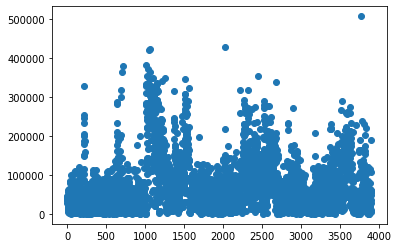

In [185]:
## Akurasi Prediksi
error_data_val = np.zeros(len(arr_single_val))
for i in range (0, len(val_model)):
  error_data_val[i] = abs(val_model[i,1] - val_model[i,2])
index = np.arange(len(error_data_val))
plt.scatter(index, error_data_val)
plt.show()

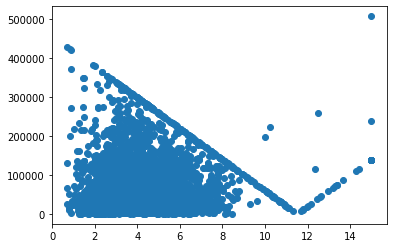

In [186]:
plt.scatter(val_model[:,0], error_data_val)
plt.show()

Mean Square Error

In [187]:
print("MSE dari Data Validasi = ", np.sum((np.square(error_data_val)))/len(error_data_val))

MSE dari Data Validasi =  10223066368.443857


#### Data Test

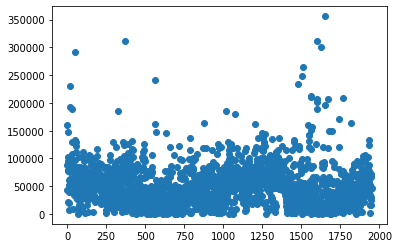

In [188]:
## Akurasi Prediksi
error_data_test = np.zeros(len(arr_single_test))
for i in range (0, len(test_model)):
  error_data_test[i] = abs(test_model[i,1] - test_model[i,2])
index = np.arange(len(error_data_test))
plt.scatter(index, error_data_test)
plt.show()

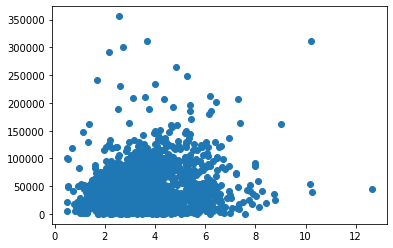

In [189]:
plt.scatter(test_model[:,0], error_data_test)
plt.show()

Mean Square Error

In [190]:
print("MSE dari Data Validasi = ", np.sum((np.square(error_data_test)))/len(error_data_test))

MSE dari Data Validasi =  4090383078.3384204


#### Evaluasi

### Model dengan Multi Variabel

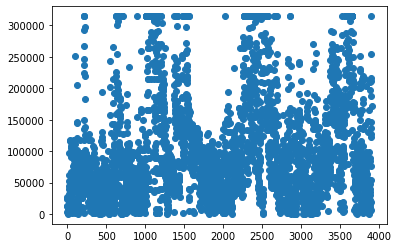

In [191]:
error_data_val_multi = np.zeros(len(y_val_multi))
for i in range (0, len(error_data_val_multi)):
  error_data_val_multi[i] = abs(val_multi_model[i,0] - val_multi_model[i,1])
index = np.arange(len(error_data_val_multi))
plt.scatter(index, error_data_val_multi)
plt.show()

# Referensi

Data
https://www.kaggle.com/datasets/camnugent/california-housing-prices

1. https://www.kaggle.com/code/aakashjoshi123/o-reilly-solution-with-my-observations-notebook
2. https://www.kaggle.com/code/amritvirsinghx/step-by-step-ml-california-housing-prices
3. https://www.kaggle.com/code/arhitbosetagore/california-house-price-eda-and-linear-regression
4. https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction 